## Training Decision Tree Model Applying RFE

### Step 1 | Import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from plot_confusion_matrix import plot_confusion_matrix

### Step 2 | Import preprocessed dataset

In [2]:
train_df = pd.read_csv('./data/preprocessed_train_df.csv')
test_df = pd.read_csv('./data/preprocessed_test_data.csv')

In [3]:
X_train = train_df.drop(columns=['NObeyesdad'])
y_train = train_df['NObeyesdad']
X_test = test_df.drop(columns=['NObeyesdad'])
y_test = test_df['NObeyesdad']

### Step 3 | Train model with selected hyperparameter from tuning function and applying RFE

In [4]:
dt = DecisionTreeClassifier(criterion = 'entropy',
 max_depth = 11,
 max_features = None,
 min_samples_leaf = 10,
 min_samples_split = 2,
 splitter = 'best',
 random_state=42)

In [5]:
cv = StratifiedKFold(n_splits=5, shuffle=False)

pipe = Pipeline([
    ('rfe', RFE(dt, n_features_to_select=None, step=1)),
    ('dt', dt)
])

In [6]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('rfe',
                 RFE(estimator=DecisionTreeClassifier(criterion='entropy',
                                                      max_depth=11,
                                                      min_samples_leaf=10,
                                                      random_state=42))),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=11,
                                        min_samples_leaf=10,
                                        random_state=42))])

In [7]:
selected_features = X_train.columns[pipe.named_steps['rfe'].get_support()].tolist()
print("Selected features:", selected_features)

Selected features: ['Gender', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'CALC']


In [8]:
X_train_sfs = X_train[selected_features]
X_test_sfs = X_test[selected_features]

In [9]:
y_pred = dt.predict(X_train_sfs)
accuracy = accuracy_score(y_train, y_pred)
print(classification_report(y_train, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9159    0.9390    0.9273      2018
           1     0.8712    0.8779    0.8745      2465
           2     0.7879    0.7863    0.7871      1942
           3     0.8059    0.8127    0.8093      2018
           4     0.9052    0.8776    0.8912      2328
           5     0.9714    0.9669    0.9691      2598
           6     0.9975    0.9975    0.9975      3237

    accuracy                         0.9039     16606
   macro avg     0.8936    0.8940    0.8937     16606
weighted avg     0.9040    0.9039    0.9039     16606



C:\Users\minhz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [10]:
y_pred = dt.predict(X_test_sfs)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9066    0.9228    0.9146       505
           1     0.8170    0.8395    0.8281       617
           2     0.7419    0.7113    0.7263       485
           3     0.7558    0.7738    0.7647       504
           4     0.8689    0.8540    0.8614       582
           5     0.9642    0.9523    0.9582       650
           6     0.9963    0.9963    0.9963       809

    accuracy                         0.8769      4152
   macro avg     0.8644    0.8643    0.8642      4152
weighted avg     0.8770    0.8769    0.8768      4152



C:\Users\minhz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


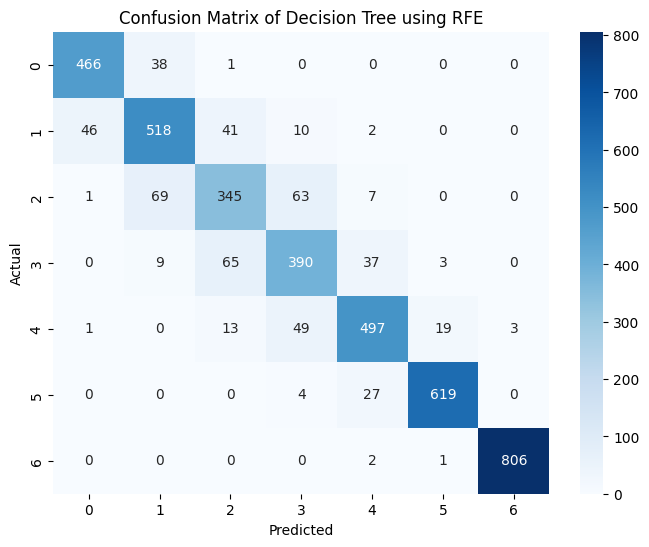

In [11]:
plot_confusion_matrix(y_test, y_pred, 'Confusion Matrix of Decision Tree using RFE')